--------------------------------------------------------------------------------------

* Team member names:
* Team member IDs:

--------------------------------------------------------------------------------------


# Mini-project 2, DSC 170, Spring 2019
## Advanced Geopandas: spatial join and geoprocessing


In this mini-project, you will explore several common geospatial computations. The goal is to practice with different types of requests against a single layer, and then work on joining several data layers using real data. The goal is to demonstrate your geopandas mastery, and also to show that you can discover datasets and critically evaluate metadata. 

For each dataset that you found and used, explore its metadata and provide a brief description (about 3 sentences): indicate its title, URL, number of records, coordinate reference system, the manner in which it was compiled (as far as you can tell from the metadata), and any data quality considerations, especially those that may influence geometric processing. 

There will be one relatively simple warm-up problem, and one larger and very real problem that the City of San Diego is struggling with. The best creative solutions to the second one will be demonstrated when Scale-SD folks come here to give an invited talk.

Note that the upload file size limit has been removed from the datahub, so you should be able to upload your data.



In [1]:
import os
os.listdir("./data/ca_county_boundaries/CA_Counties")

['CA_Counties_TIGER2016.shx',
 'CA_Counties_TIGER2016.cpg',
 'CA_Counties_TIGER2016.prj',
 'CA_Counties_TIGER2016.sbn',
 'CA_Counties_TIGER2016.sbx',
 'CA_Counties_TIGER2016.shp.xml',
 'CA_Counties_TIGER2016.shp',
 'CA_Counties_TIGER2016.dbf']

In [3]:
%matplotlib inline 
import geopandas as gpd
import pandas as pd
from shapely.geometry import Polygon
# add packages as needed

--------------------------------------------------------------------------------------
__Problem 1__. 

In an administrative boundaries map of California (find it as a GeoJSON or a shapefile on one of the web sites), find a county named San Diego and return its CRS, polygon coordinates, area (in sq miles), bounding box (in latitude and longitude), and a list of neighboring counties. 

Generally speaking, this will be a function to return geometric characteristics and neighbors of any polygon in an input dataframe (input_gdf) with a given name (poly_name) in a specific column (poly_name_field). Most lilely, in the database you find there will be a unique "San Diego" record - but it won't harm to do dissolve, just in case.

```python
def poly_geometry(input_gdf, poly_name_field, poly_name):

# YOUR CODE HERE

    return crs, poly_coords, area, bounding_box, neighbors
```



### Solution for problem 1: code and dataset description:

In [5]:
#input_gdf = gpd.read_file('  your file here  ')
def poly_geometry(input_gdf, poly_name_field, poly_name):
    # poly_name = San Diego
    # poly_name_field = State
    ca_lat_lon = input_gdf.to_crs("EPSG:4326")
    crs = input_gdf.crs
    input_gdf = input_gdf.to_crs("EPSG:3857")

    poly= input_gdf.loc[input_gdf[poly_name_field] == poly_name]["geometry"].values[0].exterior.coords

    poly_coords = Polygon(poly)
    bounding_box = ca_lat_lon.loc[ca_lat_lon[poly_name_field] == poly_name].total_bounds
    index = input_gdf.loc[input_gdf[poly_name_field] == poly_name].index[0]
    area = input_gdf.area.loc[index] * 3.86102e-7
                          
    neighbors = input_gdf[~input_gdf.geometry.disjoint(input_gdf.loc[index].geometry)][poly_name_field].values.tolist()
    neighbors = [i for i in neighbors if i!=poly_name]
    return crs, poly_coords, area, bounding_box, neighbors


In [6]:
# running the function
shpFileIn = "./data/ca_county_boundaries/CA_Counties/CA_Counties_TIGER2016.shp"

ca = gpd.read_file(shpFileIn)
input_gdf = ca
poly_name_field = 'NAME'  # or whatever is in the file
poly_name = 'San Diego' # or whatever is in the file

crs,poly_coords,area,bbox,neighbors = poly_geometry(input_gdf, poly_name_field, poly_name)

print(crs)
print(poly_coords)
print(area)
print(bbox)
print(neighbors)


epsg:3857
POLYGON ((-13073075.79626082 3919158.523585408, -13074423.87563419 3920902.47721807, -13076464.91901261 3923543.711931496, -13078660.91913112 3925902.610879234, -13080041.61510469 3927385.900115226, -13080090.26173377 3927438.207978337, -13080138.90836285 3927490.382976819, -13080291.63874351 3927700.150130602, -13080749.94120505 3928329.740504297, -13080902.78290524 3928539.655904703, -13080999.63088913 3928704.050129639, -13081290.28616034 3929197.779222346, -13081387.24546376 3929362.448991434, -13082379.10240236 3931047.486195687, -13083206.65169404 3931931.572704588, -13085563.0632365 3934449.19100154, -13088004.3002369 3936831.216795951, -13089923.22602628 3938090.488726339, -13092406.98703168 3939720.831299472, -13092402.31161339 3939738.552226207, -13092140.15423615 3940814.249824201, -13091340.88036454 3944095.790244014, -13091074.49284728 3945189.887839851, -13091022.50665081 3945419.037582617, -13090866.88201995 3946107.047241335, -13090815.00714301 3946336.3484299

__Problem 1 dataset description:__

This dataset contains shapefile boundaries for CA State, counties and places from the US Census Bureau's 2016 MAF/TIGER database. 
website: https://data.ca.gov/dataset/ca-geographic-boundaries

The coordinate system is in WSG 84. The unite is metre.


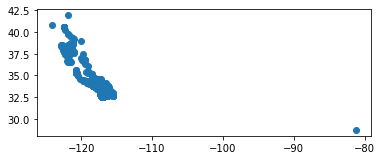

In [418]:
us.loc[us.address_state == "CA"].plot()

In [312]:
sd_census.crs

<Projected CRS: EPSG:2230>
Name: NAD83 / California zone 6 (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: USA - California - SPCS - 6
- bounds: (-118.15, 32.53, -114.42, 34.08)
Coordinate Operation:
- name: SPCS83 California zone 6 (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [417]:
us.loc[0]

account_key                                         1974000024
account_status                                          Active
date_account_creation                               1974-07-01
date_cert_expiration                       2021-06-30 12:00:00
business_owner_name                           PARRON HALL CORP
ownership_type                                            CORP
date_business_start                        1974-07-01 12:00:00
dba_name                                           PARRON HALL
naics_sector                                                44
naics_code                                                 442
naics_description          FURNITURE & HOME FURNISHINGS STORES
lat                                                    32.8063
lng                                                   -117.121
address_number                                            9655
address_pd                                                 NaN
address_road                                     GRANIT

In [411]:
ca_sites = us.loc[us.naics_sector.isin([72,44,45])]
healthy_codes = [4451,445110,4452,445210,445220,445230,445291,445292,445299,446191]
unhealthy_codes = [445120,4453,445310,7224,722410,7225,722511,722514,722515,453991]

ca_sites = ca_sites.to_crs("EPSG:2230")



healthy_sites = ca_sites.loc[ca_sites.naics_code.isin(healthy_codes)]
unhealthy_sites = ca_sites.loc[ca_sites.naics_code.isin(unhealthy_codes)]

# calculating number of healthy and unhealthy business sites
healthy_sums = []
unhealthy_sums = []
for i in range(len(sd_census)):
    unhealthy_sum = unhealthy_sites.geometry.within(sd_census.iloc[i].geometry).sum()
    healthy_sum = healthy_sites.geometry.within(sd_census.iloc[i].geometry).sum()
    healthy_sums.append(healthy_sum)
    unhealthy_sums.append(unhealthy_sum)
sd_census["healthy"] = healthy_sums
sd_census["unhealthy"] = unhealthy_sums
sd_census["healthy_ratio"] = sd_census["healthy"]/(sd_census["unhealthy"]+sd_census["healthy"])
sd_census["unhealthy_ratio"] = sd_census["unhealthy"]/(sd_census["unhealthy"]+sd_census["healthy"])
#sd_census["healthy_ratio"]= sd_census["healthy_ratio"].fillna(0)
#sd_census["unhealthy_ratio"]= sd_census["unhealthy_ratio"].fillna(1)



In [412]:
sd_merged = pd.merge(sd_census,social_estimate)
sd_merged = sd_merged.dropna()
sd_merged

,tract,shape_area,shape_len,geometry,healthy,unhealthy,healthy_ratio,unhealthy_ratio,mode income group,median,average income group,lowest income ratio,highest income ratio
0,15.00,8.693887e+06,1.244327e+04,"POLYGON ((6293438.095 1853304.830, 6293503.297...",2,0,1.000000,0.000000,2,5.0,5.0,0.081771,0.075521
1,16.00,7.407379e+06,1.132962e+04,"POLYGON ((6292472.285 1855719.495, 6292503.644...",2,2,0.500000,0.500000,1,5.0,4.0,0.205410,0.023669
2,17.00,6.714940e+06,1.079168e+04,"POLYGON ((6292613.597 1857793.035, 6292669.857...",1,0,1.000000,0.000000,3,5.0,4.0,0.129646,0.022665
3,18.00,8.036708e+06,1.392969e+04,"POLYGON ((6297364.831 1858582.740, 6297395.566...",3,5,0.375000,0.625000,3,5.0,4.0,0.151942,0.029322
7,21.00,9.573967e+06,1.676430e+04,"POLYGON ((6298904.605 1858676.690, 6298902.063...",2,1,0.666667,0.333333,2,5.0,5.0,0.084518,0.041447
...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,173.06,5.053861e+07,3.150060e+04,"POLYGON ((6262423.126 1945230.935, 6262529.092...",2,1,0.666667,0.333333,10,5.0,7.0,0.064914,0.291701
472,175.01,1.801458e+07,1.992611e+04,"POLYGON ((6243828.077 1962813.818, 6243909.025...",1,0,1.000000,0.000000,10,5.0,6.0,0.035191,0.211877
584,200.29,5.875587e+07,4.056500e+04,"POLYGON ((6278715.849 1995412.686, 6278761.369...",1,0,1.000000,0.000000,2,5.0,4.0,0.134831,0.028090
610,210.00,2.968691e+10,1.038661e+06,"POLYGON ((6588596.000 2099174.001, 6591073.000...",1,0,1.000000,0.000000,3,5.0,4.0,0.210904,0.032999


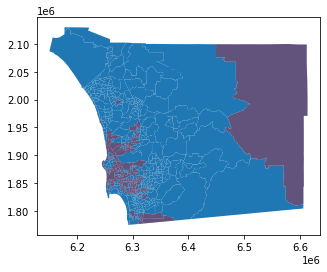

In [430]:
base = sd_census.plot()
sd_merged.plot(ax = base,color = "red",alpha = 0.3)

In [379]:
sd_merged = pd.merge(sd_census,social_estimate)
sd_merged = sd_merged.dropna()
sd_merged
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

from sklearn import linear_model
X = sd_merged[["mode income group","average income group","median","lowest income ratio","highest income ratio"]]
y = sd_merged["unhealthy_ratio"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg = LinearRegression().fit(X,y)
reg.score(X,y)


0.0471219374394386

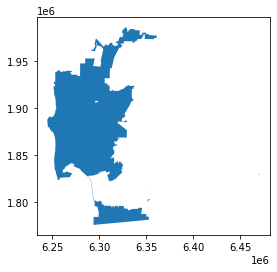

In [102]:
shpFileIn = "./data/sd_boundaries/san_diego_boundary_datasd.shp"
sd_boundaries = gpd.read_file(shpFileIn)
sd_boundaries.plot()

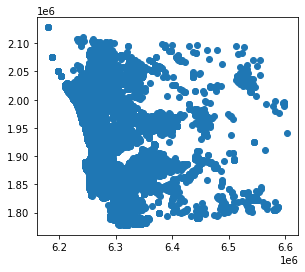

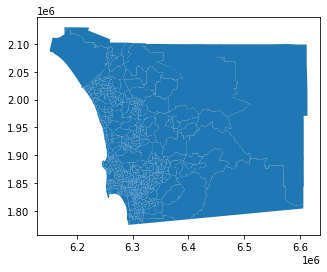

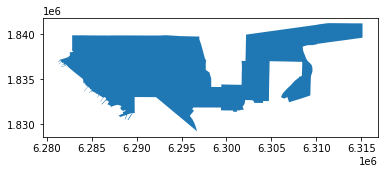

In [98]:
shpFileIn = "./data/business_sites/BUSINESS_SITES.shp"
sd_business_sites = gpd.read_file(shpFileIn)
sd_business_sites.plot()
shpFileIn = "./data/census/CENSUS_TRACTS_2010.shp"

sd_census = gpd.read_file(shpFileIn)
sd_census.plot()
shpFileIn = "./data/promise/Promise_Zone_SD.shp"

sd_promise = gpd.read_file(shpFileIn)
sd_promise.plot()

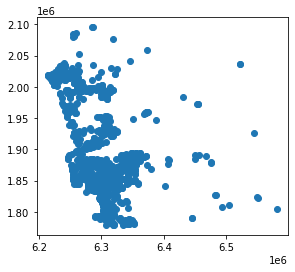

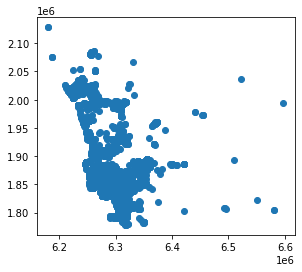

In [383]:
sd_business_sites.columns = sd_business_sites.columns.str.lower()
sd_census.columns = sd_census.columns.str.lower()
sd_promise.columns = sd_promise.columns.str.lower()
sd_business_sites["bustype"] = sd_business_sites["bustype"].str.lower()
sites_type = sd_business_sites.bustype.unique()
#I picked business type related to food, and distinguish them between healthy vs unhealthy. 
healthy = ["supermarket","foods","fish&poultry market","grocery stores"]
unhealthy = ["cafe-fast food","bar","pharmacy","food/drink cart","candy stores","beverage beer&wine","beverage-soft drink",
            "restaurant"]

healthy_sites = sd_business_sites.loc[sd_business_sites.bustype.isin(healthy)]
unhealthy_sites = sd_business_sites.loc[sd_business_sites.bustype.isin(unhealthy)]
healthy_sites.plot()
unhealthy_sites.plot()

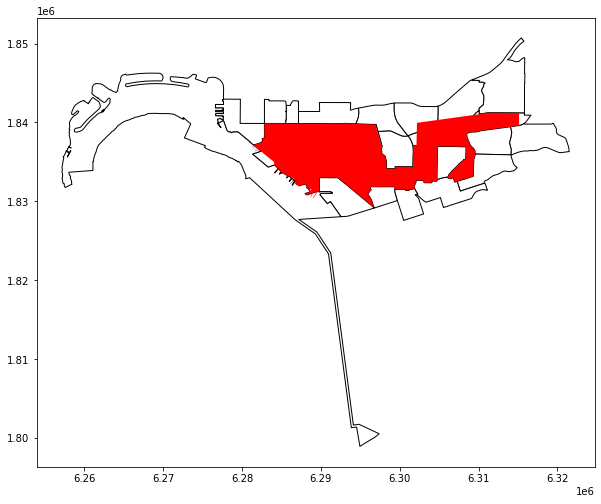

In [272]:
base = sd_census.loc[sd_census.intersects(sd_promise.iloc[0].geometry)].plot(color='white', edgecolor='black',figsize=(10,10))

sd_promise.plot(ax=base, color="red");


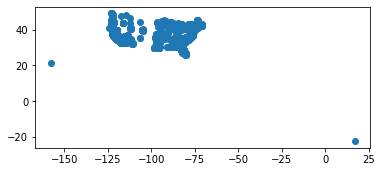

In [421]:
us.plot()

In [384]:
# calculating number of healthy and unhealthy business sites
healthy_sums = []
unhealthy_sums = []
for i in range(len(sd_census)):
    unhealthy_sum = unhealthy_sites.geometry.within(sd_census.iloc[i].geometry).sum()
    healthy_sum = healthy_sites.geometry.within(sd_census.iloc[i].geometry).sum()
    healthy_sums.append(healthy_sum)
    unhealthy_sums.append(unhealthy_sum)
sd_census["healthy"] = healthy_sums
sd_census["unhealthy"] = unhealthy_sums
sd_census["healthy_ratio"] = sd_census["healthy"]/(sd_census["unhealthy"]+sd_census["healthy"])
sd_census["unhealthy_ratio"] = sd_census["unhealthy"]/(sd_census["unhealthy"]+sd_census["healthy"])
#sd_census["healthy_ratio"]= sd_census["healthy_ratio"].fillna(0)
#sd_census["unhealthy_ratio"]= sd_census["unhealthy_ratio"].fillna(1)



In [386]:
sd_merged

,tract,shape_area,shape_len,geometry,healthy,unhealthy,healthy_ratio,unhealthy_ratio,mode income group,median,average income group,lowest income ratio,highest income ratio
0,15.00,8.693887e+06,12443.272111,"POLYGON ((6293438.095 1853304.830, 6293503.297...",2,3,0.400000,0.600000,2,5.0,5.0,0.081771,0.075521
1,16.00,7.407379e+06,11329.616060,"POLYGON ((6292472.285 1855719.495, 6292503.644...",4,11,0.266667,0.733333,1,5.0,4.0,0.205410,0.023669
2,17.00,6.714940e+06,10791.678584,"POLYGON ((6292613.597 1857793.035, 6292669.857...",1,0,1.000000,0.000000,3,5.0,4.0,0.129646,0.022665
3,18.00,8.036708e+06,13929.689427,"POLYGON ((6297364.831 1858582.740, 6297395.566...",2,13,0.133333,0.866667,3,5.0,4.0,0.151942,0.029322
7,21.00,9.573967e+06,16764.302881,"POLYGON ((6298904.605 1858676.690, 6298902.063...",2,6,0.250000,0.750000,2,5.0,5.0,0.084518,0.041447
...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,218.00,1.618195e+07,24061.882405,"POLYGON ((6274139.898 1834593.163, 6274087.589...",0,6,0.000000,1.000000,10,5.0,7.0,0.055172,0.224138
623,219.00,1.168310e+08,91895.012950,"POLYGON ((6297188.499 1829212.755, 6297249.733...",10,8,0.555556,0.444444,4,5.0,4.0,0.187023,0.013359
624,220.00,8.376307e+06,17466.687568,"POLYGON ((6303295.597 1829889.616, 6303309.950...",3,4,0.428571,0.571429,2,5.0,4.0,0.154499,0.016129
625,221.00,2.002754e+08,68792.224715,"POLYGON ((6241332.792 1999515.332, 6241884.729...",9,22,0.290323,0.709677,10,5.0,6.0,0.046711,0.205362


In [354]:
estimate = pd.read_csv("data/2019_census_estimate",delimiter = "\t")
estimate.columns = estimate.columns.str.lower()
estimate = estimate.loc[estimate.year==2019]
estimate["average"] = estimate["ordinal"] * estimate["households"]
def calculate_values(df):
    mode = df["ordinal"].loc[df["households"].idxmax()]
    population = df["households"].sum()
    average = df["average"].sum()/population
    lowest = df["households"].loc[df["ordinal"] == 1].values[0]/population
    highest = df["households"].loc[df["ordinal"] == 10].values[0]/population
    df = df.reset_index()
    for i in range(len(df)):

        median_list.extend([df.loc[i]["ordinal"]] * df.loc[i]["households"])
    median = np.median(np.array(median_list))
                
    new_df = pd.DataFrame(data = {"mode income group":mode,"median":median,"average income group":round(average),"lowest income ratio":lowest,"highest income ratio":highest},index=[0])
    return new_df
    
social_estimate = estimate.groupby(["tract"]).apply(calculate_values)
social_estimate = social_estimate.reset_index().drop("level_1",axis = 1)
social_estimate

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in long_scalars
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in long_scalars
  if __name__ == '__main__':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in long_scalars
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in long_scalars
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in long_scalars
  if __name__ == '__main__':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in long_scalars
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value 

,tract,mode income group,median,average income group,lowest income ratio,highest income ratio
0,1.00,10,8.0,7.0,0.040632,0.325809
1,2.01,6,7.0,6.0,0.121832,0.120858
2,2.02,6,6.0,5.0,0.088596,0.081140
3,3.00,4,6.0,5.0,0.126780,0.066780
4,4.00,3,6.0,5.0,0.034821,0.070536
...,...,...,...,...,...,...
622,216.00,6,5.0,5.0,0.075269,0.092473
623,218.00,10,5.0,7.0,0.055172,0.224138
624,219.00,4,5.0,4.0,0.187023,0.013359
625,220.00,2,5.0,4.0,0.154499,0.016129


In [405]:
sd_merged[["median","unhealthy"]].corr()

,median,unhealthy
median,1.000000,-0.020979
unhealthy,-0.020979,1.000000


In [410]:
sd_merged = pd.merge(sd_census,social_estimate, on="tract")
sd_merged = sd_merged.dropna()
sd_merged
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

from sklearn import linear_model
X = sd_merged[["median","lowest income ratio","highest income ratio"]]
y = sd_merged["unhealthy_ratio"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg = LinearRegression().fit(X,y)
reg.score(X,y)


0.01251090537209154

In [353]:
median_list = []
df = estimate.reset_index()
for i in range(10):
    
    median_list.extend([df.loc[i]["ordinal"]] * df.loc[i]["households"])
np.median(np.array(median_list))

8.0

In [296]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

from sklearn import linear_model
X = sd_merged[["mode income group","average income group","lowest income ratio","highest income ratio"]]
y = sd_merged["unhealthy_ratio"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg = DecisionTreeRegressor(max_depth=2).fit(X_train, y_train)
reg.score(X_train, y_train)



0.05059375316131687

--------------------------------------------------------------------------------------

__Problem 2.__

Food choices in low and medium income (LMI) neighborhoods are limited, as these areas lack healthy food stores or other fresh food delivery mechanisms. There may be more fast food stores than fresh produce shops. Population is relatively poor, and filling the food basket with healthy options hasn't been an overwhelming priority for many households. Such areas are referred to as "food deserts". 

See these articles:
* https://www.sandiegouniontribune.com/news/data-watch/sdut-san-diego-food-deserts-2016may15-htmlstory.html (see food desert definitions here)
* https://www.npr.org/sections/thesalt/2013/03/13/174112591/how-to-find-a-food-desert-near-you
* https://www.geospatial.institute/wp-content/uploads/2018/03/Mapping-Food-Desserts-in-Southern-California-Counties.pdf 
* https://www.sandiegoreader.com/news/2018/sep/04/stringers-imperial-beach-food-desert/# (a recent one, about IB)
* https://www.kpbs.org/news/2018/mar/29/sdsu-students-take-food-deserts-national-city/
* http://newscenter.sdsu.edu/sdsu_newscenter/news_story.aspx?sid=74890 
* https://grist.org/food/americas-worst-food-deserts-map-lovers-edition/
* https://ucsdcommunityhealth.org/news/promoting-produce-consumption/

There was also a Master's thesis at UCSD: https://escholarship.org/uc/item/0s78j9g2

Don't read them all, just skim to understand the issues and get ideas.

We'll analyze the current state of food deserts, using lists of businesses that operate in San Diego, and social-demographic data from SanDAG (by census tracts). 

For the list of businesses, let's use City of San Diego tax certificates:
https://data.sandiego.gov/datasets/business-listings/. These data are current, and include lat/lon. They also include detailed NAICS codes for each business. This is the recommended dataset. We are interested in active certificates. We are also interested in types of businesses that are relevant to healthy (and unhealthy) food options. Healthy food options would include FOOD (HEALTH) SUPPLEMENT STORES, GROCERY STORES and GROCERY (EXCEPT CONVENIENCE) STORES. Unhealthy food options would include FOOD SERVICES & DRINKING PLACES, FULL-SERVICE RESTAURANTS, LIMITED-SERVICE EATING PLACES, LIMITED-SERVICE RESTAURANTS (a.k.a fast food places), BEER, WINE & LIQUOR STORES, TOBACCO STORES, CONVENIENCE STORES (a mixed bag...). We have provided this as part of the assignment. You don't need to download it, but you may if you wish.


There is also "SanDAG's point locations of business sites" in San Diego County (see metadata at http://rdw.sandag.org/Account/GetFSFile.aspx?dir=Business&Name=BUSINESS_SITES.pdf). This is already a shapefile, so this is a plus (but note  disclaimers in the metadata). The date is 8/17/2017, i.e. not as current. Industry codes are not as detailed as NAICS in the City's dataset. 

We'll also get relevant spatial data layers from SanDAG: Promise Zone, and census tract boundaries. Note that you'll need to create a free account to access Sandag GIS data warehouse.

Descriptions of promise zones can be found at these links:
* https://www.hud.gov/sites/documents/SAN-DIEGO_ZONE_3RD.PDF
* https://www.sandiego.gov/economic-development/sdpromisezone/maps
* https://www.sandiego.gov/economic-development/sdpromisezone

To download the shapefiles, visit the SanDAG's "Maps and GIS" section:
* Promise Zone is under Business. Metadata at http://rdw.sandag.org/Account/GetFSFile.aspx?dir=Business&Name=Promise_Zone_SD.pdf. Alternatively, you can use https://data.sandiego.gov/datasets/promise-zone/
* Census tracts are under Census. Metadata at http://rdw.sandag.org/Account/GetFSFile.aspx?dir=Census&Name=CENSUS_TRACTS_2010.pdf. 

Social-demographic data by census tracts can be downloaded from SanDAG at https://sandag.org/index.asp?classid=26&fuseaction=home.classhome. You can try to find the data yourself - but  we also include an xlsx file with some income statistics by census tracts. 

San Diego County municipal boundaries (metadata at http://rdw.sandag.org/Account/GetFSFile.aspx?dir=Jurisdiction&Name=Municipal_Boundaries.pdf) can be downloaded from the same GIS Data Warehouse, under the "Jurisdiction" section. Alternatively, use https://data.sandiego.gov/datasets/san-diego-boundary/ (we only need the boundary of San Diego city, so the latter is quite sufficient.)

Your tasks:

1. Download the data - promise zone, census tracts, jurisdictions (census tracts social-demographic data and businesses data are provided but you can download as well if you wish), read them into geopandas dataframes, and merge social-demographic data with tract boundaries as needed.

2. Subset the businesses (figure out, from NAICS descriptions, which businesses are likely to provide healthy food options, and which unhealthy. You can use our suggestions above but also feel free to deviate from them as long as you justify your choices.)

3. Determine census tracts intersecting with the promise zone, and all other census tracts within the boundary of San Diego.

4. For each census tract marked as belonging to the promise zone, and the other tracts within the city limits, calculate the number of healthy and not-healthy options within that tract. 

5. Compute the ratio of healthy and non-healthy options, and build a regression model showing how it depends on social-demographic characteristics, such as median income or number of people in lowest and highest income brackets. You may use sklearn on this dataframe by tracts to compute a linear regresson (as you did in DSC80. As a refresher, you may also check out https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9, https://towardsdatascience.com/linear-regression-in-python-9a1f5f000606, https://stackoverflow.com/questions/29934083/linear-regression-on-pandas-dataframe-using-sci-kit-learn/29937049). Provide a brief description of regression results.

6. Generate a map showing the ratio of healthy and not healthy food options, and the locations of stores offering healthy food options. 

7. Extra Credit: Think of additional variables that you could bring into this analysis, and try to include them in the regression. ScaleSD is running a hackathon on this topic, and they have a good collection of data sources: https://www.scalesd.com/hackathon-2019/food-insecurity.html. 


We won't provide a skeleton for this problem. This is a much more open project than before. 


In [438]:
world = gpd.read_file(gpd.datasets.get_path('nybb'))
world

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


### Solution for problem 2: code, dataset descriptions, discussion of regression results:

__Problem 2 dataset descriptions:__

1. `us` dataset contains naics code, and coordinates of all the business sites operated before and after 2008. Businesses that operate within San Diego must get a business tax certificate issued by the City Treasurer. This dataset includes all active and inactive business tax certificates issued since 1990. The geographical information is indicated by `lat` and `lng` columns

2. `sd_census` contains geographic information about each census tract. The crs is 2230.

3. `sd_promise` is the geographical information about each promise zones, the crs is 2230.

4. `estimate` contains income groups and estimated number of people in each income group in 2019 for each census tract.


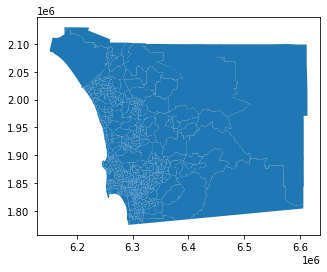

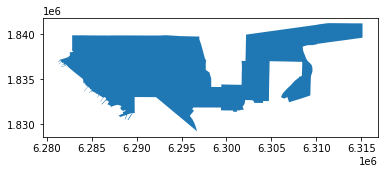

In [439]:
#tract and corresponding geometry
shpFileIn = "./data/census/CENSUS_TRACTS_2010.shp"
sd_census = gpd.read_file(shpFileIn)
sd_census.plot()

#Promise zone geometry
shpFileIn = "./data/promise/Promise_Zone_SD.shp"
sd_promise = gpd.read_file(shpFileIn)
sd_promise.plot()

In [428]:
# combining business sites registered before 2008 and after 2008 into the same df
us_pre= pd.read_csv("data/sd_business/sd_businesses_active_pre08_datasd_v1.csv")
us_since = pd.read_csv("data/sd_business/sd_businesses_active_since08_datasd_v1.csv")
us = pd.concat([us_pre,us_since],axis = 0)
us = us.loc[~us.lat.isna()|~us.lng.isna()]
us = gpd.GeoDataFrame(
    us, geometry=gpd.points_from_xy(us.lng, us.lat))
us = us.set_crs("EPSG:4326")
us = us.reset_index().drop("index",axis = 1)
us.shape

(70493, 26)

In [429]:
# estimation of income of each tract,
#group by the tract and get the mode, median, average, and lowest income group percentage,
# highest income group percentage for each tract. 
estimate = pd.read_csv("data/2019_census_estimate",delimiter = "\t")
estimate.columns = estimate.columns.str.lower()
estimate = estimate.loc[estimate.year==2019]
estimate["average"] = estimate["ordinal"] * estimate["households"]
def calculate_values(df):
    mode = df["ordinal"].loc[df["households"].idxmax()]
    population = df["households"].sum()
    average = df["average"].sum()/population
    lowest = df["households"].loc[df["ordinal"] == 1].values[0]/population
    highest = df["households"].loc[df["ordinal"] == 10].values[0]/population
    df = df.reset_index()
    for i in range(len(df)):

        median_list.extend([df.loc[i]["ordinal"]] * df.loc[i]["households"])
    median = np.median(np.array(median_list))
                
    new_df = pd.DataFrame(data = {"mode income group":mode,"median":median,"average income group":round(average),"lowest income ratio":lowest,"highest income ratio":highest},index=[0])
    return new_df
    
social_estimate = estimate.groupby(["tract"]).apply(calculate_values)
social_estimate = social_estimate.reset_index().drop("level_1",axis = 1)
social_estimate

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in long_scalars
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in long_scalars
  if sys.path[0] == '':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in long_scalars
  del sys.path[0]
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in long_scalars
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in long_scalars
  if sys.path[0] == '':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in long_scalars
  del sys.path[0]
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1

,tract,mode income group,median,average income group,lowest income ratio,highest income ratio
0,1.00,10,5.0,7.0,0.040632,0.325809
1,2.01,6,5.0,6.0,0.121832,0.120858
2,2.02,6,5.0,5.0,0.088596,0.081140
3,3.00,4,5.0,5.0,0.126780,0.066780
4,4.00,3,5.0,5.0,0.034821,0.070536
...,...,...,...,...,...,...
622,216.00,6,5.0,5.0,0.075269,0.092473
623,218.00,10,5.0,7.0,0.055172,0.224138
624,219.00,4,5.0,4.0,0.187023,0.013359
625,220.00,2,5.0,4.0,0.154499,0.016129


__Problem 2 discussion of linear regression results:__

 Your text here

## Responses to the extra credit questions:

Your text here

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# Please let us know how much time you spent on this project, in hours: 
# (we will only examine distributions and won't look at individual responses)
assignment_timespent = 
extracredit_timespent = 